<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2); line-height: 1.5;">
    <center style="color:white;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:black;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
</div>


## Import các thư viện cần thiết

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Đọc dữ liệu từ CSV
df = pd.read_csv('../Data/who_life_exp.csv')
df.head()

## Tiền xử lí + phân tích dữ liệu để trả lời câu hỏi

### Câu 1

### Câu 2: Tuổi thọ trung bình của 5 quốc gia có GDP bình quân đầu người cao nhất châu Á trong 10 năm gần đây thay đổi như thế nào?

- Nhóm dữ liệu theo 'country', tính GNI bình quân đầu người và chọn ra 5 quốc gia có GNI cao nhất. Lấy chỉ mục (tên quốc gia) của 
  các quốc gia này.
- Lọc DataFrame để chỉ bao gồm các dòng tương ứng với 5 quốc gia hàng đầu đã chọn.
- Lọc DataFrame để chỉ bao gồm dữ liệu trong 10 năm gần đây, sử dụng năm lớn nhất trừ đi 9 để có khoảng thời gian mong muốn.
- Tạo một biểu đồ đường sử dụng Matplotlib với mỗi quốc gia được đại diện bằng một đường và điểm dữ liệu trên biểu đồ. Chú thích 
  (legend) hiển thị tên của mỗi quốc gia. Các trục được đặt tên là 'Năm' và 'Tuổi thọ trung bình', và tiêu đề của biểu đồ là "So 
  sánh tuổi thọ của 5 quốc gia có thu nhập quốc dân cao nhất châu Á trong 10 năm qua".

In [ ]:
# Chọn các quốc gia có GDP bình quân đầu người cao nhất
top_countries = df.groupby('country')['gni_capita'].mean().nlargest(5).index

# Lọc dữ liệu cho 5 quốc gia này
filtered_df = df[df['country'].isin(top_countries)]

# Lọc theo 10 năm gần đây
recent_10_years = filtered_df[filtered_df['year'] >= df['year'].max() - 9]

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 7))

for country in top_countries:
    country_data = recent_10_years[recent_10_years['country'] == country]
    plt.plot(country_data['year'], country_data['life_expect'], label=country, marker='o')

plt.xlabel('Năm')
plt.ylabel('Tuổi thọ trung bình')
plt.title('So sánh tuổi thọ của 5 quốc gia có thu nhập quốc dân cao nhất châu Á trong 10 năm qua')
plt.legend()
plt.show()

- Dựa vào biểu đồ ta có một số kết luận sau:
    - Nhìn chung, tuổi thọ trung bình ở 5 quốc gia có thu nhập cao nhất châu Á đều tăng dần trong 10 năm gần đây. Điều này cho thấy chất lượng cuộc sống và hệ thống y tế ở các nước này đã được cải thiện đáng kể.
    - Singapore là quốc gia có tuổi thọ trung bình cao nhất trong số 5 nước, và cũng có xu hướng tăng ổn định qua các năm. Tuổi thọ trung bình của Singapore tăng từ gần 81 tuổi lên hơn 83 tuổi.
    - Qatar có xu hướng tăng tuổi thọ trung bình tương đối ổn định, từ khoảng gần 77 tuổi lên gần 79 tuổi trong 10 năm gần đây. Mức tăng này thấp hơn Singapore.
    - Ở những năm đầu, tuổi thọ trung bình của UAE thấp hơn Brunei, nhưng về sau thì đã cao hơn vì xu hướng tuổi thọ tăng đều qua các năm.
    - Brunei có tuổi thọ trung bình tăng chậm nhất trong 5 nước, chỉ dao động trong khoảng 76 - 77 tuổi. Lí do là xu hướng tăng không đều, có những năm tăng mạnh nhưng cũng có những năm giảm.
    - Tương tự như UAE, Kuwait có xu hướng tăng tuổi thọ đều qua các năm. Nhưng có tuổi thọ trung bình thấp nhất trong 5 nước, chỉ dao động ở quanh mức 73-75 tuổi.
- Biểu đồ cho thấy tuổi thọ trung bình ở các nước thu nhập cao nhất châu Á có xu hướng tăng dần trong 10 năm gần đây, trong đó Singapore nước có tốc độ tăng tuổi thọ nhanh nhất.

### Câu 3

### Câu 4

### Câu 5: Xu hướng thay đổi về tuổi thọ trung bình ở các nước có mức thu nhập thấp, trung bình thấp, trung bình cao và cao trên thế giới khác nhau như thế nào?

- Xác định ngưỡng thu nhập cho mỗi mức độ: thấp, trung bình thấp, trung bình cao và cao.
- Lọc các nước thuộc từng mức độ thu nhập dựa trên ngưỡng đã đặt.
- Lọc dữ liệu để chỉ bao gồm các năm từ năm 2000 đến năm gần nhất có dữ liệu.
- Nhóm dữ liệu theo năm và tính tuổi thọ trung bình cho mỗi mức độ thu nhập.
- Sử dụng Matplotlib để vẽ biểu đồ đường, mỗi đường đại diện cho xu hướng thay đổi về tuổi thọ kỳ vọng của mỗi mức độ thu nhập. Điểm dữ liệu được ký hiệu bằng 'o', và chú thích (legend) hiển thị tên của mỗi đường. Trục x là năm, trục y là tuổi thọ trung bình.

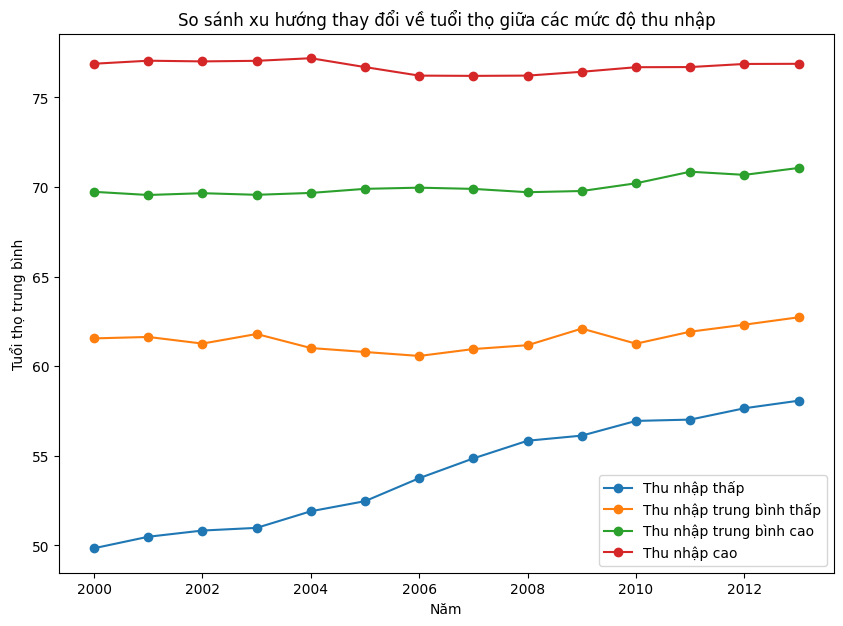

In [5]:
# Đặt ngưỡng thu nhập cho từng mức độ
low_income_threshold = 1045
low_middle_income_threshold = 4095
high_middle_income_threshold = 12695

# Chọn nước thuộc từng mức độ thu nhập
low_income_countries = df[df['gni_capita'] <= low_income_threshold]
low_middle_income_countries = df[(df['gni_capita'] > low_income_threshold) & (df['gni_capita'] <= low_middle_income_threshold)]
high_middle_income_countries = df[(df['gni_capita'] > low_middle_income_threshold) & (df['gni_capita'] <= high_middle_income_threshold)]
high_income_countries = df[df['gni_capita'] > high_middle_income_threshold]

# Lọc dữ liệu các năm 2000 - 2016
years = df[df['year'] >= df['year'].max()]

# Nhóm dữ liệu theo năm và tính tuổi thọ kỳ vọng trung bình cho từng mức độ thu nhập
avg_life_expect_low_income = low_income_countries.groupby('year')['life_expect'].mean()
avg_life_expect_low_middle_income = low_middle_income_countries.groupby('year')['life_expect'].mean()
avg_life_expect_high_middle_income = high_middle_income_countries.groupby('year')['life_expect'].mean()
avg_life_expect_high_income = high_income_countries.groupby('year')['life_expect'].mean()

# Vẽ biểu đồ so sánh xu hướng
plt.figure(figsize=(10, 7))

plt.plot(avg_life_expect_low_income.index, avg_life_expect_low_income, label='Thu nhập thấp', marker='o')
plt.plot(avg_life_expect_low_middle_income.index, avg_life_expect_low_middle_income, label='Thu nhập trung bình thấp', marker='o')
plt.plot(avg_life_expect_high_middle_income.index, avg_life_expect_high_middle_income, label='Thu nhập trung bình cao', marker='o')
plt.plot(avg_life_expect_high_income.index, avg_life_expect_high_income, label='Thu nhập cao', marker='o')

plt.xlabel('Năm')
plt.ylabel('Tuổi thọ trung bình')
plt.title('So sánh xu hướng thay đổi về tuổi thọ giữa các mức độ thu nhập')
plt.legend()
plt.show()

- Dựa vào kết luận ta có một số kết luận sau:

- Nhìn chung, tuổi thọ trung bình ở các quốc gia có thu nhập tốt hơn thì nằm cao hơn so với các nước có thu nhập thấp hơn. Điều này cho thấy chất lượng cuộc sống và hệ thống y tế ảnh hưởng lớn đến tuổi thọ.
    - Ở các quốc gia có mức thu nhập cao thì tuổi thọ trung bình cũng cao nhất, luôn nằm trên mức 75 tuổi và cũng có xu hướng ổn định qua các năm. 
    - Đối với các quốc gia có mức thu nhập trung bình cao thì luôn có xu hướng tăng tuổi thọ trung bình nhẹ, mức tăng từ 70 lên đến 73. Mức tăng này vẫn thấp hơn so với các nước có mức thu nhập cao
    - Các quốc gia thu nhập trung bình thấp thì tuổi thọ trung bình tăng giảm không đồng đều, có những năm tăng và cũng có những năm giảm, chỉ dao động ổn định quanh mức 60 - 64 tuổi.
    - Đối với các quốc gia thu nhập thấp, tuổi thọ trung bình tăng nhanh nhất trong 4 nhóm các quốc gia, tăng mạnh từ mức 50 đến gần 60 tuổi. 
- Biểu đồ cho thấy tuổi thọ trung bình ở các nước thu nhập cao và trung bình cao có xu hướng ổn định qua các năm, còn với các nước thu nhập thấp và trung bình thấp có xu hướng tăng nhưng vẫn nằm ở mức thấp so với hai nhóm nước còn lại.

### Câu 6